<a href="https://colab.research.google.com/github/samuelshoun/Useful-MWEs/blob/main/lognormal_distribution_fit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This method for rapidly fitting a most likely distribution for a data sample is frequently used in the upstream oil & gas industry, most commonly by engineers and geoscientists interested in characterizing the uncertainty and risk assocated with a particular measure (ex. EUR, porosity, etc.).
<br><br>
Its use in oil and gas was advanced by Pete Rose before modern desktop computing made larger-scale statistical simulation a practical option. The rapidity and simplicity of the method keep it highly relevant today.
<br><br>
For more detail on the use of this method for unconventional oil & gas reservoir evaluation, I recommend <a href=https://spee.org/store/>SPEE Monograph 3, Guidelines for the Practical Evaluation of Undeveloped Reserves in Resource Plays</a>.
<br><br>
In this example I use log scale for the data axis, which tests the expectation of lognormally distributed data. The Python library used (<a href='https://pypi.org/project/probscale/'>mpl-probscale</a>) and the method itself readily adapt to normal distribution.
<br><br>

In [60]:
# probscale is not installed by default in Colab
!pip install probscale

In [61]:
# relevant imports

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mt
import seaborn as sns
import probscale as ps

## Options for inputs `x`
Here I provide a couple options for input data in case anyone might clone the notebook and run it with particular data.

In [62]:
# generate lognormally distributed data

x_synthetic = np.random.lognormal(np.log(85), 0.4, 20)
x_synthetic

array([124.76089985,  75.66752948, 107.36818581, 109.3517    ,
        60.11529857,  94.09113004,  53.05414408, 128.11578627,
        75.18287433,  78.77502706,  61.31300379,  96.70891948,
       110.64327233,  83.73845396,  54.37346228,  90.45116106,
       167.67240507,  78.03908946,  60.29434673,  68.90535329])

In [63]:
# or paste data between the quotes

x = (
"""
764049
573906
658946
526291
232534
1208277
399628
50411
399441
98081
344313
278782
84343
325892
51749
513676
958943
565395
1200565
441504
329528
558472
199549
""")
x = x.split('\n')
x = [i for i in x if i!='']
x

['764049',
 '573906',
 '658946',
 '526291',
 '232534',
 '1208277',
 '399628',
 '50411',
 '399441',
 '98081',
 '344313',
 '278782',
 '84343',
 '325892',
 '51749',
 '513676',
 '958943',
 '565395',
 '1200565',
 '441504',
 '329528',
 '558472',
 '199549']

## Fit the line, extract fit parameters, and plot.

In [35]:
# define a function to extract P90/P50/P10 from the best fit line
# note the distinction: we want the quantiles from the most likely
# distribution, not the data itself.

def swanson_pairs(best_fit_data):
    """
    best_fit_data:  This input should take the form returned by
                    probscale.probplot as `best_fit_results`.
    """

    bfd = best_fit_data

    # by convention, we'll examine quantiles required for a Swanson's Mean
    probs = np.array([.1, .5, .9])

    # convert those quantiles to z-values
    zs = stats.norm.ppf(probs)

    # get the associated x values and convert back to linear scale
    vals = np.exp((zs - bfd['res']['intercept']) / bfd['res']['slope'])

    # return the P90/50/10 as a list
    return list(zip(vals, probs * 100))

''

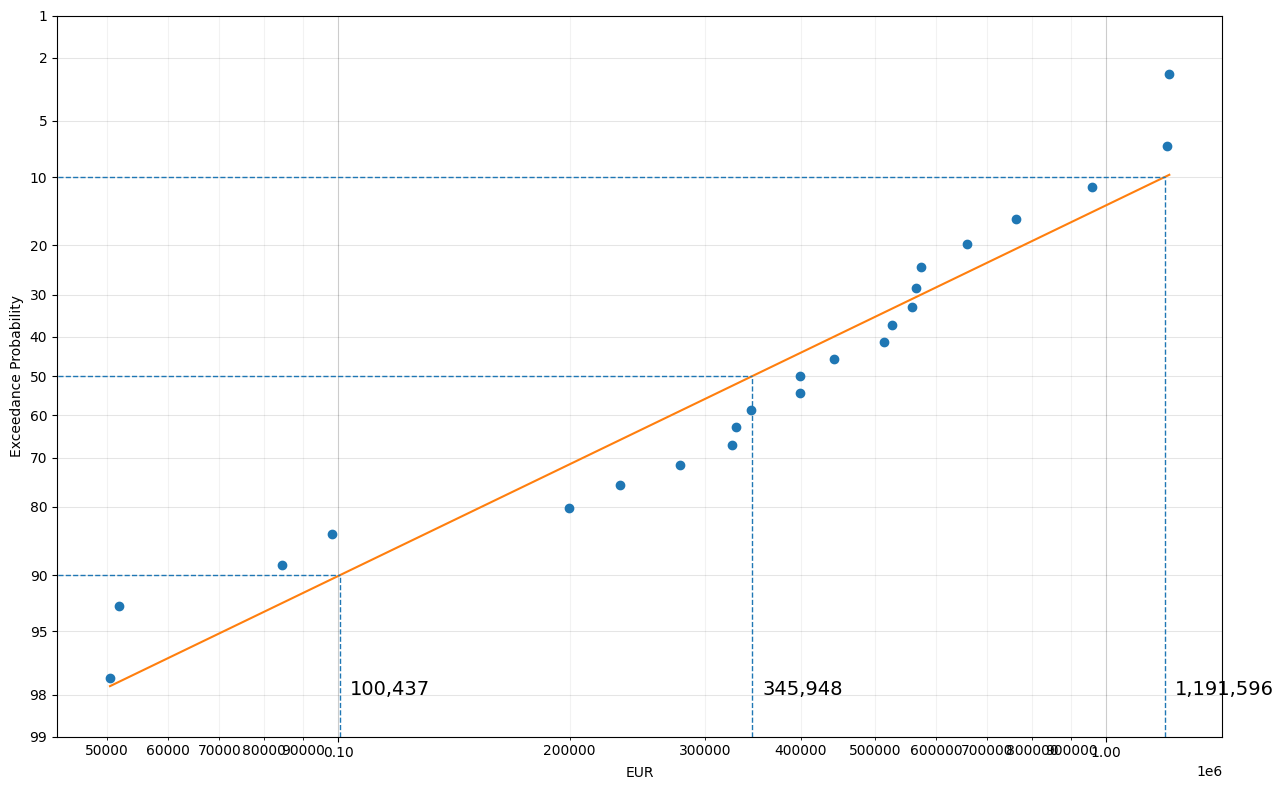

In [53]:
fig, ax = plt.subplots(figsize=(13,8))

# probplot with the option set to return the best fit information
_, fit = ps.probplot(x, probax='y', datascale='log', ax=ax, bestfit=True, return_best_fit_results=True)

# use the previously defined function to draw on the plot
for i in swanson_pairs(fit):
    ax.vlines(i[0], ymin=1, ymax=i[1], ls='--', lw=1)
    ax.hlines(i[1], xmin=0, xmax=i[0], ls='--', lw=1)
    ax.text(i[0]*1.03, 2, '{:,.0f}'.format(i[0]), fontsize=14)

# by convention, we prefer to view percentile exceedance probability
ax.set_yticks([1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 95, 98, 99])
ax.set_yticklabels(100 - ax.get_yticks())

# additional visual refinements & labeling
ax.grid(which='major', axis='x', c='k', alpha=.2)
ax.grid(which='minor', axis='x', c='k', alpha=.05)
ax.grid(which='major', axis='y', c='k', alpha=.1)
ax.xaxis.set_minor_formatter(mt.ScalarFormatter())
ax.xaxis.set_major_formatter(mt.ScalarFormatter())
ax.set_ylabel('Exceedance Probability')
ax.set_xlabel('EUR')
plt.tight_layout()
;

In [64]:
# to view the resulting quantiles of interest directly
swanson_pairs(fit)

[(100436.7289457755, 10.0),
 (345948.03458421037, 50.0),
 (1191596.3800184247, 90.0)]